# Exploratory data analysis(EDA) With Python

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('data.csv')
print(df.head())

  BranchName  Week  DayWeek  Day  Month  Hour Transaction_Type  Units   Amount
0    MyStore     1        3    2      1     9             Card      3   $54.00
1    MyStore     1        3    2      1    10             Cash      7  -$17.80
2    MyStore     1        3    2      1    10             Card      7   $41.99
3    MyStore     1        3    2      1    11             Card     20  $412.50
4    MyStore     1        3    2      1    12             Cash      1  -$18.00


In [ ]:
df['Amount'] = df['Amount'].str.replace('$','').str.replace(',','')
df['Amount'] = pd.to_numeric(df['Amount'])
print(df.head())

  BranchName  Week  DayWeek  Day  Month  Hour Transaction_Type  Units  Amount
0    MyStore     1        3    2      1     9             Card      3   54.00
1    MyStore     1        3    2      1    10             Cash      7  -17.80
2    MyStore     1        3    2      1    10             Card      7   41.99
3    MyStore     1        3    2      1    11             Card     20  412.50
4    MyStore     1        3    2      1    12             Cash      1  -18.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BranchName        4100 non-null   object 
 1   Week              4100 non-null   int64  
 2   DayWeek           4100 non-null   int64  
 3   Day               4100 non-null   int64  
 4   Month             4100 non-null   int64  
 5   Hour              4100 non-null   int64  
 6   Transaction_Type  4100 non-null   object 
 7   Units             4100 non-null   int64  
 8   Amount            4100 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 288.4+ KB


In [ ]:
# Remove unwanted 
df.drop('BranchName',axis=1, inplace=True)
df.head(10) # First 5 records

,Week,DayWeek,Day,Month,Hour,Transaction_Type,Units,Amount
0,1,3,2,1,9,Card,3,54.00
1,1,3,2,1,10,Cash,7,-17.80
2,1,3,2,1,10,Card,7,41.99
3,1,3,2,1,11,Card,20,412.50
4,1,3,2,1,12,Cash,1,-18.00


In [ ]:
df.head(10)

,BranchName,Week,DayWeek,Day,Month,Hour,Transaction_Type,Units,Amount
0,MyStore,1,3,2,1,9,Card,3,54.00
1,MyStore,1,3,2,1,10,Cash,7,-17.80
2,MyStore,1,3,2,1,10,Card,7,41.99
3,MyStore,1,3,2,1,11,Card,20,412.50
4,MyStore,1,3,2,1,12,Cash,1,-18.00
5,MyStore,1,3,2,1,12,Card,1,-5.00
6,MyStore,1,3,2,1,12,Card,15,118.50
7,MyStore,1,3,2,1,13,Cash,90,-94.92
8,MyStore,1,3,2,1,13,Card,28,423.50
9,MyStore,1,3,2,1,14,Cash,34,-95.39


In [ ]:
df.shape

(4100, 9)

In [ ]:
df.describe()

,Week,DayWeek,Day,Month,Hour,Units,Amount
count,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000
mean,34.017805,4.183902,15.812195,8.231463,12.949024,12.779512,35.237046
std,14.714289,1.967864,8.810817,3.396586,2.631853,17.854968,183.538724
min,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,-1041.800000
25%,29.000000,3.000000,8.000000,7.000000,11.000000,3.000000,-47.000000
50%,37.000000,4.000000,16.000000,9.000000,13.000000,8.000000,-2.385000
75%,45.000000,6.000000,23.000000,11.000000,15.000000,16.000000,99.512500
max,53.000000,7.000000,31.000000,12.000000,19.000000,274.000000,1487.000000


In [ ]:
df['Units'].count()

4100

## Distribution Plot

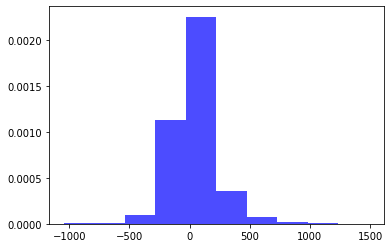

In [ ]:
num_bins = 10
plt.hist(df['Amount'], num_bins, density=1, facecolor='blue', alpha=0.7)
plt.show()

The data varies from `-1000` to `1000` sums up how much the amount varies.

## Sales by Month, Day and Hour

### By Month

Month
1     604
7     606
8     572
9     580
10    581
11    587
12    570
dtype: int64


Text(0, 0.5, 'Total Sales')

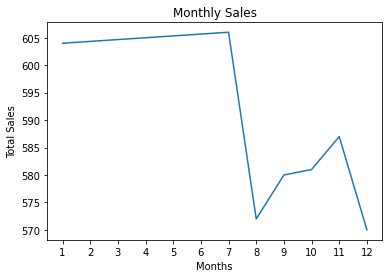

In [ ]:
sales_by_month = df.groupby('Month').size()
print(sales_by_month)
#Plotting the Graph
plot_by_month = sales_by_month.plot(title='Monthly Sales',xticks=(1,2,3,4,5,6,7,8,9,10,11,12))
plot_by_month.set_xlabel('Months')
plot_by_month.set_ylabel('Total Sales')

### By Day

Text(0, 0.5, 'Total Sales')

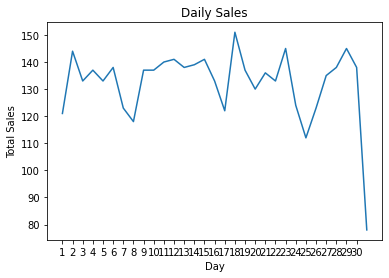

In [ ]:
sales_by_day = df.groupby('Day').size()
plot_by_day = sales_by_day.plot(title='Daily Sales',xticks=(range(1,31)))
plot_by_day.set_xlabel('Day')
plot_by_day.set_ylabel('Total Sales')
#plot_by_day.grid(color='r', linestyle='-', linewidth=0.3)

As such, the 18th day was the best day, that day 151 units were sold and the last sale of the month was drastically reduced.

### By Hour

Text(0, 0.5, 'Total Sales')

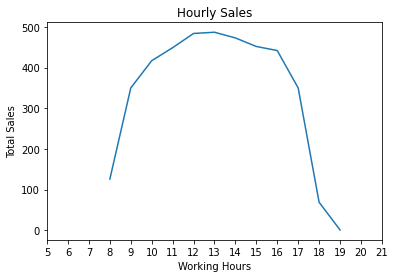

In [ ]:
sales_by_hour = df.groupby('Hour').size()
plot_by_hour = sales_by_hour.plot(title='Hourly Sales',xticks=(range(5,22)))
plot_by_hour.set_xlabel('Working Hours')
plot_by_hour.set_ylabel('Total Sales')

 Majority of the customers come in afternoon. The frequency gets quite low during closing time.